# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of this year's survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I necourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)
#pd.set_option('display.max_columns', 360)

/Users/ivan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.rename(columns={'_STATE': 'state' ,'PHYSHLTH': 'physical_health', 'SMOKDAY2': 'smoking'}, inplace= True)    # renaming 2 columns

In [4]:
conditions = [ df['state'] == 9. ,df['state'] == 34. ,df['state'] == 36.]
choises = ['Connecticut', 'New Jersey', 'New York']
df['state'] = np.select(conditions, choises, default = 'NA')

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

Now check to see how large our subset df.

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [5]:
df['physical_health'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: physical_health, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [6]:
#df[(df.physical_health != 99.0) & (df.physical_health != 77.0)]

In [7]:
df.drop(df[df['physical_health'] == 99.0 ].index, inplace=True)   # Delete values where patient - 'Refused'
df.drop(df[df['physical_health'] == 77.0 ].index, inplace=True)   # Delete values where patient - 'Don't know/Not Sure
df.physical_health = np.where(df.physical_health == 88.0, 0, df.physical_health)
df.physical_health.shape

(33747,)

In [8]:
df.loc[df['physical_health'] == 99.0 ].index

Int64Index([], dtype='int64')

In [9]:
df.physical_health.isna().value_counts()

False    33747
Name: physical_health, dtype: int64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [10]:
len(df.physical_health.unique())

31

In [11]:
# descriptive statistics
df.physical_health.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: physical_health, dtype: float64

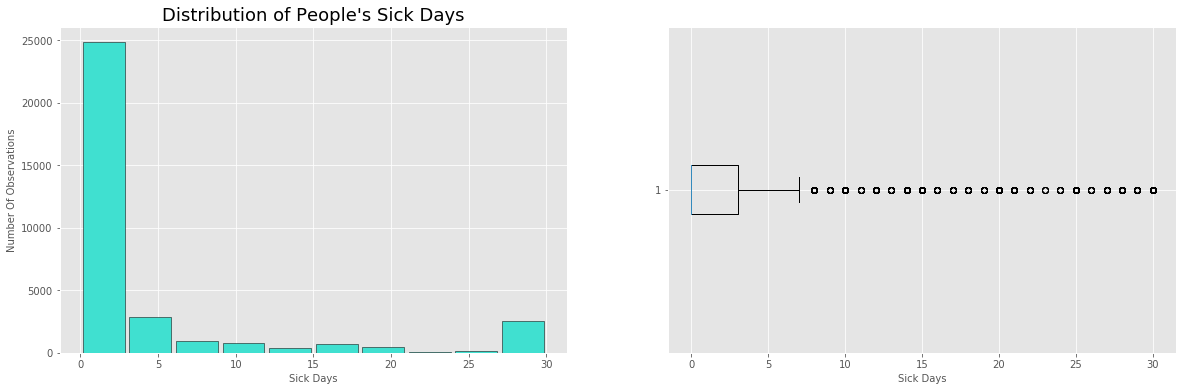

In [12]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(df.physical_health, color='turquoise', rwidth = 0.9, edgecolor= 'black')
ax1.set_title("Distribution of People's Sick Days", size= 18)
ax1.set_xlabel('Sick Days', size=10)
ax1.set_ylabel('Number Of Observations', size=10)

ax2.boxplot(df.physical_health, vert = False)
ax2.set_xlabel('Sick Days', size=10)
plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [13]:
# code to calculate the average number of sick days by state
state_grouped = df.groupby('state')['physical_health'].mean()
state_grouped

state
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: physical_health, dtype: float64

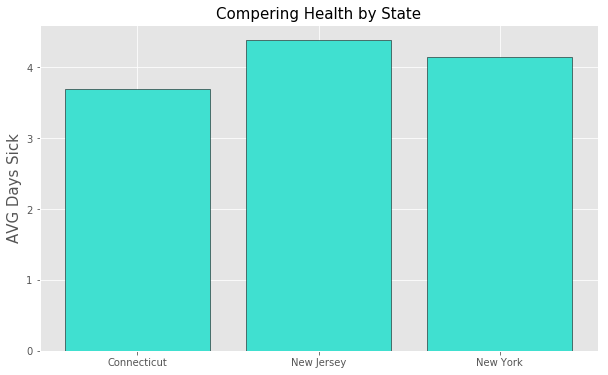

In [14]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(state_grouped.index ,state_grouped.values, color='turquoise', edgecolor= 'black', align='center')
ax.set_title('Compering Health by State', size=15)
ax.set_ylabel('AVG Days Sick', size=15)
plt.show()

In [15]:
ct = df.loc[ df['state'] == 'Connecticut' , ['physical_health']]
nj = df.loc[ df['state'] == 'New Jersey' , ['physical_health']]
ny = df.loc[ df['state'] == 'New York' , ['physical_health']]

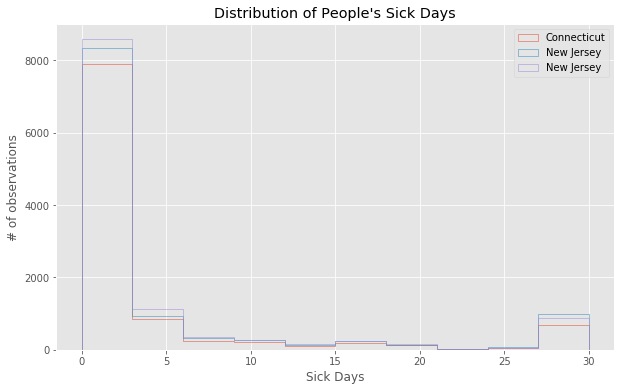

In [16]:
#graphic showing the histogram of data
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(ct.values , label="Connecticut", histtype='step')
ax.hist(nj.values, label="New Jersey", histtype='step')
ax.hist(ny.values, label="New Jersey", histtype='step')

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()
plt.show()


## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [17]:
# code to create new colum for chronically sick
df['chron'] = np.where(df['physical_health']>15, 1, 0)

In [18]:
df.chron.value_counts()

0    30474
1     3273
Name: chron, dtype: int64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [19]:
# code to calculate averages per state
chron_sick=df.groupby('state')['chron'].value_counts(normalize=True).loc[:,1]*100
chron_sick

state
Connecticut     8.623836
New Jersey     10.830861
New York        9.548670
Name: chron, dtype: float64

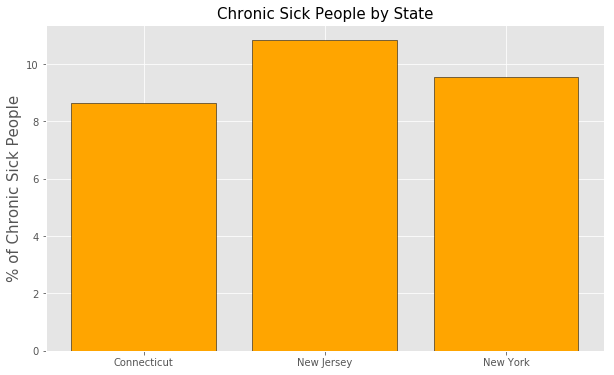

In [20]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(chron_sick.index ,chron_sick.values, color='orange', edgecolor= 'black', align='center')
ax.set_title('Chronic Sick People by State', size=15)
ax.set_ylabel('% of Chronic Sick People', size=15)
plt.show()

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [21]:
#df = df[~df.smoking.isna()]  # droping NaN from smoking
conditions = [ df['smoking'] == 1.0 ,df['smoking'] == 2.0 ,df['smoking'] == 3.0, df['smoking'] == 7.0, df['smoking'] == 9.0]
choises = ['Everyday', 'Some Days', 'Non-Smoker', "Dont'know", 'Refused']
df['smoking'] = np.select(conditions, choises)

In [22]:
pct_smoking = df['smoking'].value_counts(normalize=True)*100

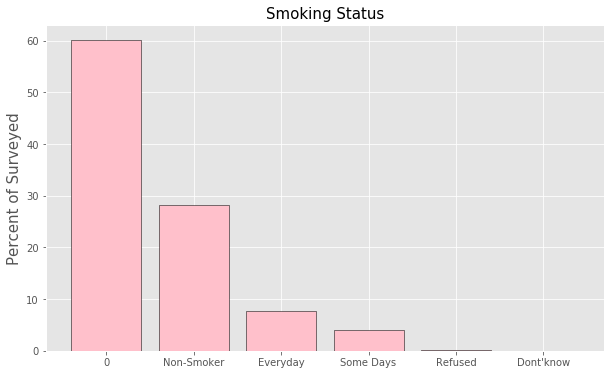

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(pct_smoking.index ,pct_smoking.values, color='pink', edgecolor= 'black', align='center')
ax.set_title('Smoking Status', size=15)
ax.set_ylabel('Percent of Surveyed', size=15)
plt.show()

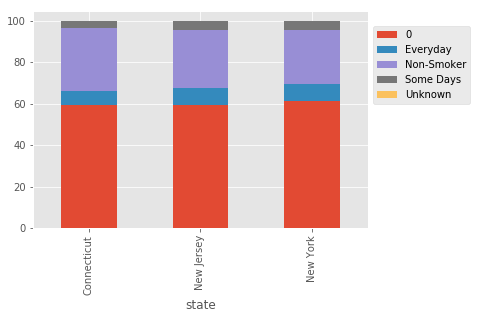

In [24]:
smk_groupped = df.groupby(['state'])['smoking'].value_counts(normalize=True)*100

unst = smk_groupped.unstack()
unst['Unknown'] = unst['Refused']+ unst["Dont'know"]
unst.drop(columns=["Dont'know",'Refused'],inplace=True)
unst.plot(kind = 'bar', stacked = True )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.show()

In [25]:
smk_groupped.unstack()

smoking,0,Dont'know,Everyday,Non-Smoker,Refused,Some Days
state,,,,,,
Connecticut,59.435321,0.019207,6.779987,30.404302,0.057620,3.303563
New Jersey,59.565369,0.008728,7.863501,28.355734,0.017455,4.189213
New York,61.173796,0.025261,8.454025,25.926238,0.109464,4.311216


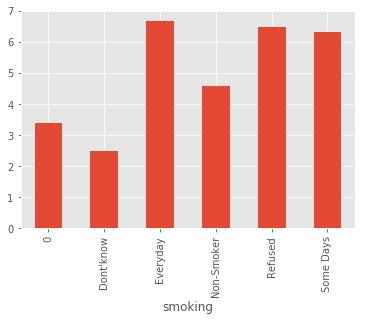

In [26]:
df.groupby('smoking')['physical_health'].mean().plot(kind='bar')
plt.show()

In [27]:
df1 = df.copy()

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [28]:
conditions = [
            ((df1['ALCDAY5']>=101.0) & (df1['ALCDAY5']<=107.0)),
            ((df1['ALCDAY5']>=201.0) & (df1['ALCDAY5']<=230.0)),
            df1['ALCDAY5']==888]

choices = [
    (df1['ALCDAY5']-100)*4,
    df1['ALCDAY5']-200,
    0]

df1['alcohol'] = np.select(conditions, choices, default = np.nan)


In [29]:
df1.dropna(subset=['alcohol'], inplace=True)

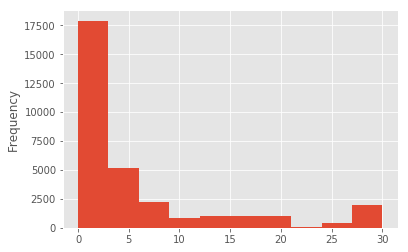

In [30]:
# graphic showing the histogram of data
df1['alcohol'].plot(kind='hist')
plt.show()

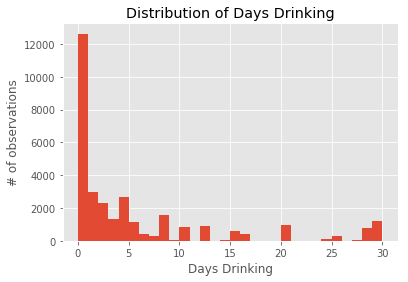

In [31]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df1['alcohol'], bins=30)

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of Days Drinking")

plt.show()

In [32]:
# code to calculate averages per state
alc_state =df1.groupby('state')['alcohol'].mean()
alc_state

state
Connecticut    6.036227
New Jersey     4.913481
New York       5.139898
Name: alcohol, dtype: float64

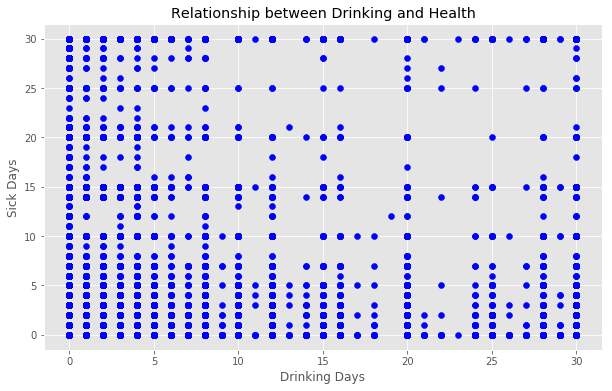

In [33]:
fig, ax = plt.subplots(figsize=(10,6))

# Add data: "height", "weight" as x-y, index as color
ax.scatter(df1['alcohol'], df1['physical_health'],c ='b')

ax.set_xlabel("Drinking Days")
ax.set_ylabel("Sick Days")
ax.set_title('Relationship between Drinking and Health')


plt.show()

In [34]:
df1[['physical_health', 'alcohol']].corr()['physical_health']

physical_health    1.000000
alcohol           -0.090443
Name: physical_health, dtype: float64

In [35]:
df1 = df.copy()

In [36]:
df1['SEX'] = df1['SEX'].map({1.0 : 'Male', 2.0 : 'Female', 4.0 : None })
df1.dropna(subset= ['SEX'], inplace= True)

## 8. Statistical Inference

# - Create a 95% confidence interval for the population mean of physically ill days.

In [37]:
import scipy.stats as scs
import math

In [38]:
def confidence_interval(sample, threshold):
    """
    params : sample - lsit of valuses with continuos values
             trashold - integer as pct
    """
    n = len(sample) # number of observations in the sample
    m = sum(sample)/n # mean, avg
    sigma = sample.std() # diviation 
    z_score = scs.norm.ppf(1-(1-threshold/100)/2)

    moe = z_score*(sigma/math.sqrt(n)) # calculate margin of error
    conf_interval = (m-moe, m+moe)
    
    return """
    
    We are {}% confident that true population mean falls between {} and {} days
    """.format(threshold, round(conf_interval[0],2), round(conf_interval[1],2))

In [39]:
print(confidence_interval(df1['physical_health'], 95))


    
    We are 95% confident that true population mean falls between 3.99 and 4.18 days
    


# -  Create a 95% confidence interval for the true proportion of chronically sick people.

In [40]:
df1['chron'].unique()  # 1 is chronically sick people, 0 - not

array([0, 1])

In [41]:
def conf_interv_true_pop(sample, true_pop, threshold):
    """
    params : sample - lsit of valuses - categorical dats with 2 types of val (True/False)
             true_pop - portion from sample with true population (numeric)
             trashold - integer as pct
    """
    
    n = len(sample)
    p_h = len(true_pop)/n  # define proportion of true pop.
    # checkimg conditions using the sampling distribution of the sample proportion: 
    # With successes being at least 10, the condition to use the z-method 
    # to calculate the interval is acceptable.
    
    if n*p_h > 10 and n*(1-p_h)>10:
        
        z_score = scs.norm.ppf(1-(1-threshold/100)/2)
        sigma = (p_h*(1-p_h)/n)**(0.5)
        moe = z_score*sigma
        conf_interval = (p_h-moe, p_h+moe)

        return """
        
        We are {}% confident that proportion of chronicly sick people for the overal population falls btw {}% and {}%
        """.format(threshold,round(conf_interval[0]*100,2),round(conf_interval[1]*100,2))

In [42]:
true_pop = df1.chron[df['chron']==1]  # data with only chron sick people
print(conf_interv_true_pop(df1['chron'], true_pop, 95))


        
        We are 95% confident that proportion of chronicly sick people for the overal population falls btw 9.38% and 10.01%
        


** For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  


## 9. Hypothesis Tests

## a) The following questions are regarding the PHYSHLTH variable.

# What is the probability of getting this sample mean for days physically ill, if the population mean is 4?

 
 When p < alpha : Reject the Null Hypothesis and accept the Alternative Hypothesis

 When p > alpha : Fail to reject the Null Hypothesis.

In [43]:
# 1) Write down the null and alternative hypothesis you are testing.

# H0: (True  Hyphotes): The population mean is 4
# Ha: population mean is not = 4

In [44]:
#2) Select the appropriate test and calculate the test statistic and P-values.
# we dont have STD of the population - will go to T-test
# Two tail test : Ha: mu != 4

In [45]:
# 3) Determine the critical value for the 95% confidence interval.
# alpha = 0.025

In [46]:
# 4) Evaluate the test statistic agains the critical value.

In [47]:
def two_sides_test(sample, null_m, threshold):
    
    """
    params : sample - lsit of numric valuses 
             null_m - population mean for H0
             trashold - integer as pct
    """
    
    n = len(sample)     # sample size
    s = sample.std()    # STD of Sample
    x_ = sample.mean()  # Sample Mean
    mu = null_m         # proposed population mean
    alpha = (1-(threshold)/100)/2
    df = n-1
    
    t_crit = scs.t.ppf(1 - alpha, df=df)   # critical value 
    t = (x_ - mu)/(s/(n)**0.5)# find the test statistic
    
    p = 1-scs.t.cdf(t, df=df) 
    print(p)
    
     
    
    if t > t_crit or t < -t_crit :     #Evaluate the test statistic agains the critical value
        
        return """
        
        We reject the null Hypotesys because the test statistic fall in the rejection area.
        Based one statistical test our t value = {}, which gets in rejection area defined by critical values {} and -{}.
        The probability of getting this sample mean is {}%
        """.format(round(t,2),round(t_crit,2),round(t_crit,2), p*100)
    
    else:
        return """
        
        There is not enough evidence to reject the null Hypotesys.
        Based one statistical test our t value = {},which does not get 
        in rejection area defined by critical values {} and -{}.
        The probability of getting this sample is {}%.
                    """.format(round(t,2),round(t_crit,2),round(t_crit,2),round(p*100,2))    

In [48]:
print(two_sides_test(df1['physical_health'], 4, 95))

0.03390866769801115

        
        There is not enough evidence to reject the null Hypotesys.
        Based one statistical test our t value = 1.83,which does not get 
        in rejection area defined by critical values 1.96 and -1.96.
        The probability of getting this sample is 3.39%.
                    


## Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?

In [49]:
# 1) Write down the null and alternative hypothesis you are testing.

# H0: There is a significant difference between men and women in the number of days a person feels phsyically ill? m1-m2 !=0
# Ha: There is no no differance between men and women in the number of days a person feels phsyically ill. m1 = m2 

In [50]:
#2) Select the appropriate test and calculate the test statistic and P-values.
# We dont have STD of the population - will go to T-test
# T test  - Difference of 2 means (m1-m2)

In [51]:
# 3) Determine the critical value 

In [52]:
# 4) Evaluate the test statistic agains the critical value.

In [97]:
def diff_two_means(sample, threshold):
    
    x_f, x_m = df1.groupby('SEX')['physical_health'].mean().values
    s_f, s_m = df1.groupby('SEX')['physical_health'].std()
    n_f, n_m = df1.groupby('SEX')['physical_health'].count()
    
    alpha = (1-(threshold)/100)/2
    df = len(sample)-1
    t_crit = scs.t.ppf(1 - alpha, df=df)   # critical value 
    numer = (x_f - x_m) - 0
    denum = math.sqrt((s_f**2/n_f)+(s_m**2/n_m))
    delta_mu = numer/denum
    
    p = 1-scs.t.cdf(delta_mu, df=df) 
    print(p)
    if delta_mu > t_crit or delta_mu < - t_crit :
        
        return """
        We reject the null Hypotesys because based one statistical test two groups sample means difference 
        is = {}, which gets in rejection area defined by critical values {} and -{}.
        """.format(round(delta_mu,2),round(t_crit,2),round(t_crit,2))
    
    else:
        return """
        There is not enough evidence to reject the null Hypotesys because based one statistical test
        two groups sample means difference is = {}, which does not get in rejection area defined by critical values {} and -{}.
        """.format(round(delta_mu,2),round(t_crit,2),round(t_crit,2))

In [98]:
print(diff_two_means(df1,95))

3.82761807236065e-05

        We reject the null Hypotesys because based one statistical test two groups sample means difference 
        is = 3.96, which gets in rejection area defined by critical values 1.96 and -1.96.
        


## Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.


In [55]:
# 1) Write down the null and alternative hypothesis you are testing.

# H0: There is statistically significant difference in physical health of people from the three states
# Ha: There is no no differance between difference is physical health of people from the three states

In [56]:
#2) Select the appropriate test and calculate the test statistic and P-values.
# As we have more then 2 groups (3 states) and we trying to compare physicsl health - will have to use ANOVA
#          𝐻0  :  𝜇1  =  𝜇2  =  𝜇3
#          𝐻𝑎  :  𝐻0  is not true
# ANOVA - Analysis of Variance  (Perfoming F-test)
# ANOVA will tell us if at least 1 of the groups not like another one

In [57]:
df1.groupby('state')['physical_health'].mean()

state
Connecticut    3.684555
New Jersey     4.380957
New York       4.149078
Name: physical_health, dtype: float64

/Users/ivan/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


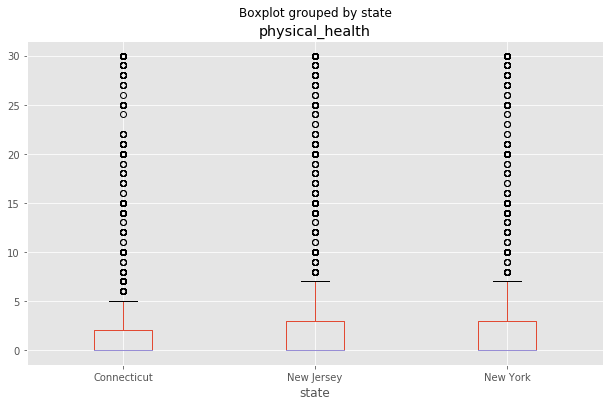

In [58]:
#Create a boxplot
df1.boxplot('physical_health', by='state', figsize=(10,6))
plt.show()

In [59]:
from statsmodels.formula.api import ols   # like a linear reg function and calculates f stat as well
import statsmodels.api as sm

In [60]:
def anova_test(df, variable, threshold):
    """
    params : df - dataframe 
             variable - String / collumn name in data
             trashold - integer as pct. confidance. level
    """
    alpha = round(1-threshold/100,2)
    # t_crit = scs.t.ppf(alpha, df=len(df)-1)
    # fit the model / can yopu predict a phys_halth based on state
    anova_states = ols('{}~state'.format(variable), data=df1).fit()
    anova_table = sm.stats.anova_lm(anova_states, type=2)
    # print(anova_table)
    f_score = round(anova_table['F']['state'],2)
    # lets check what is the probability to get f_score or biger
    pr = anova_table['PR(>F)']['state'] 
    
    if pr < alpha:
        
        return """
        We reject the null Hypotesys because the test statistic falls in the rejection area.
        Based one statistical test our value pr = {}, which smaller then trashold = {}.
        """.format(pr,alpha)
    
    else:
        
        return """
        There is not enough evidence to reject the null Hypotesys because the test statistic does not fall in the rejection area.
        Based one statistical test our value pr = {}, which way smaller then trashold = {}.
        Another way we couldn't conclude that there is relationship between state and phys_health of patients. 
                    """.format(pr,alpha)
    

In [61]:
print(anova_test(df1[['state','physical_health']], 'physical_health', 95))


        We reject the null Hypotesys because the test statistic falls in the rejection area.
        Based one statistical test our value pr = 6.998830805800168e-09, which smaller then trashold = 0.05.
        


## The following questions are regarding the CHRONIC variable.

# What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?

In [62]:
# 1) Write down the null and alternative hypothesis you are testing.

# H0 (True  Hyphotes) Chronically true population proportion is 0.10?
# Ha Chronically true population proportion is not 0.10

In [63]:
# 2) Select the appropriate test and calculate the test statistic and P-values.
# Test for Population proportion! Two-tailed, non-directional

In [64]:
# 3) Determine critical value for 95% interval conf!

In [65]:
# 4) Evaluate the test statistic agains the critical value.

In [66]:
true_pop = df1.chron[df1['chron']==1]  # data with only chron sick people

In [67]:
def population_proportion_test(sample, true_pop, p_0, threshold):
    """
    params : sample - lsit of valuses - categorical dats with 2 types of val (True/False)
             true_pop - portion from sample with true population (numerical val)
             p_0 - true population proportion (0.10 for 10%)
             trashold - integer as pct
    """
    n = len(sample)
    p_h = len(true_pop)/n  # define proportion of true pop.
    # checkimg conditions using the sampling distribution of the sample proportion: 
    # With successes being at least 10, the condition to use the z-method 
    # to calculate the interval is acceptable.
    
    if n*p_h > 10 and n*(1-p_h)>10:
        
        numer = p_h - p_0                    # calculate test - statistic value
        denum = math.sqrt(p_0*(1-p_0)/n)
        z_score = numer/denum
        
        z_critical = scs.norm.ppf(1-(1-threshold/100)/2)  #  Determine critical value for 95% interval conf!
        
        p = scs.norm.cdf(z_score)
    
        if z_score > z_critical or z_score < - z_critical:    # Evaluate the test statistic agains the critical value.
            
            return """
            We reject the null Hypotesys because the test statistic falls in the rejection area.
            Based one statistical test our z_value = {}, which gets in rejection area defined by critical values {} and -{}.
            The probability of getting this sample mean is {}%
            """.format(round(z_score,2),round(z_critical,2),round(z_critical,2), p*100)
        else:
            
            return """
            There is not enough evidence to reject the null Hypotesys
            Based one statistical test our z_value = {}, which does not get in rejection area defined by critical values {} and -{}.
            The probability of getting this sample mean is {}%
            """.format(round(z_score,2),round(z_critical,2),round(z_critical,2), round(p*100,2))
        


In [68]:
print(population_proportion_test(df1['chron'], true_pop, p_0 =0.10, threshold=95))


            There is not enough evidence to reject the null Hypotesys
            Based one statistical test our z_value = -1.87, which does not get in rejection area defined by critical values 1.96 and -1.96.
            The probability of getting this sample mean is 3.09%
            


# Is there a statistically significant difference in the percentage of men and women who are chronically sick?

In [69]:
# 1) Write down the null and alternative hypothesis you are testing.

# H0 (True  Hyphotes) There is significant difference in the percentage of men and women who are chronically sick
# Ha : There is no significant difference in the percentage of men and women who are chronically sick

In [70]:
# 2) Select the appropriate test and calculate the test statistic and P-values.
# Test for Difference of two Population proportion!

In [71]:
# 3) Determine critical value for 95% interval conf!

In [72]:
# 4) Evaluate the test statistic agains the critical value.

In [73]:
chron_male = df1[df1['SEX']=='Male']
chron_female = df1[df1['SEX']=='Female']

In [74]:
def two_population_proportion_test(sample1, sample2, variable, threshold):
    """
    params : sample1 - male pop
             sample2 - female ppop
             variable - string / df column name /
             trashold - integer - pct amount
    """
    n_m = len(sample1)
    n_f = len(sample2)
    n_male_cr = sample1.groupby(variable)[variable].count().values[1]
    n_female_cr = sample2.groupby(variable)[variable].count().values[1]
    
    alpha = (1-(threshold)/100)/2
    df = (n_m + n_f) -1
    t_crit = scs.t.ppf(1 - alpha, df=df)   # critical value 
    
    p_m = n_male_cr/n_m
    p_f = n_female_cr/n_f
    
    p = (n_male_cr+n_female_cr)/(n_m+n_f)
    
    numer = p_m - p_f
    denum = (p*(1-p)*(1/n_m + 1/n_f))**0.5
    
    delta_p = numer/denum
    
    perce = (1-scs.norm.cdf(delta_p))
    
    if delta_p > t_crit or delta_p < - t_crit :

        return """
        We reject the null Hypotesys. Based one statistical test difference of 2 proportions
        our value = {}, which gets in rejection area defined by critical values {} and -{}.
        """.format(round(delta_p,2),round(t_crit,2),round(t_crit,2))
    else:
        
        return """
        There is not enough evidances to reject the null Hypotesys.
        Based one statistical test difference of 2 proportions
        our value = {}, which does not get in rejection area defined by critical values {} and -{}.
        """.format(round(delta_p,2),round(t_crit,2),round(t_crit,2))
    

In [75]:
print(two_population_proportion_test(chron_male, chron_female, 'chron', 95))


        We reject the null Hypotesys. Based one statistical test difference of 2 proportions
        our value = -4.73, which gets in rejection area defined by critical values 1.96 and -1.96.
        


# Perform a statistical test to determine if there is a statistically significant difference in proportion of people with chronic health issues from the three states.

In [76]:
# 1) Write down the null and alternative hypothesis you are testing.

# H0 (True  Hyphotes) There is significant difference in physical health of people from the three states
# Ha : There is no significant difference in physical health of people from the three states

# 2) Select the appropriate test and calculate the test statistic and P-values.
# Chi Test as we have different groups with categorical data

# 3) Determine critical value for 95% interval conf!

# 4) Evaluate the test statistic agains the critical value.

In [77]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2 

In [78]:
chron_by_state = df1.groupby('chron')['state'].value_counts().unstack()

In [79]:
chron_by_state

state,Connecticut,New Jersey,New York
chron,,,
0,9503,10217,10739
1,895,1241,1134


In [80]:
def run_chiss(variable, threshold):
    """
    params : 
    """
    alpha = 1- threshold/100
    stat, p, dof, expected = chi2_contingency(variable) 
    
    critical = chi2.ppf(alpha, dof) 
    
    print('critical = %.3f, stat = %.3f' % (critical, stat))
    print(p)
    
    if abs(stat) >= critical:
        
        return"""
        We reject the null Hypotesys. Based one statistical Chi test: 
        stat value = {}, which gets in rejection area defined by critical values {}.
        """.format(round(stat,2), round(critical,2))
        
    else:

        return """
        There is not enough evidances to reject the null Hypotesys.
        Based one statistical Chi test comparing 3 different groups with categorical variables.
        stat value = {}, which does not get in rejection area defined by critical value {}.
        """.format(round(stat,2),round(critical,2))

#     if p <= alpha:
#         print('Dependent (reject H0)')
#     else:
#         print('Independent (fail to reject H0)')  
        

In [81]:
print(run_chiss(chron_by_state, 95))

critical = 0.103, stat = 31.214
1.667230814806794e-07

        We reject the null Hypotesys. Based one statistical Chi test: 
        stat value = 31.21, which gets in rejection area defined by critical values 0.1.
        


# 10. Independent Investigation


Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.

# Label: How many days did you do physical activities or exercises to STRENGTHEN your muscles per Month

In [82]:
conditions = [
            ((df1['STRENGTH']>=101.0) & (df1['STRENGTH']<=107.0)),
            ((df1['STRENGTH']>=201.0) & (df1['STRENGTH']<=230.0)),
            df1['STRENGTH']==888]

choices = [
    (df1['STRENGTH']-100)*4,
    df1['STRENGTH']-200,
    0]

df1['phisactiv'] = np.select(conditions, choices, default = np.nan)
df1.dropna(subset=['phisactiv'], inplace=True)
df1['phisactiv'] = df1['phisactiv'].map(lambda x: int(x))

# Determine the sample mean and sample standard deviation

In [83]:
mean = df1['phisactiv'].mean()
std = df1['phisactiv'].std()

print (("""
Average days people exercise per month : {} days,
STD for days people exercise per month : {} days.
""").format(round(mean,2),round(std,2)))


Average days people exercise per month : 5.07 days,
STD for days people exercise per month : 7.87 days.



# Create a confidence interval for a population mean.

In [84]:
print(confidence_interval(df1['phisactiv'], 95))


    
    We are 95% confident that true population mean falls between 4.98 and 5.16 days
    


# Perform a two-sample test of means for gender

In [85]:
print(diff_two_means(df1['phisactiv'], 95))


        We reject the null Hypotesys because based one statistical test two groups sample means difference 
        is = 6.54, which gets in rejection area defined by critical values 1.96 and -1.96.
        


# Perform a one-way ANOVA using your categorical independent variable.

In [86]:
df1.groupby('state')['phisactiv'].mean()

state
Connecticut    5.330634
New Jersey     4.967141
New York       4.932231
Name: phisactiv, dtype: float64

/Users/ivan/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


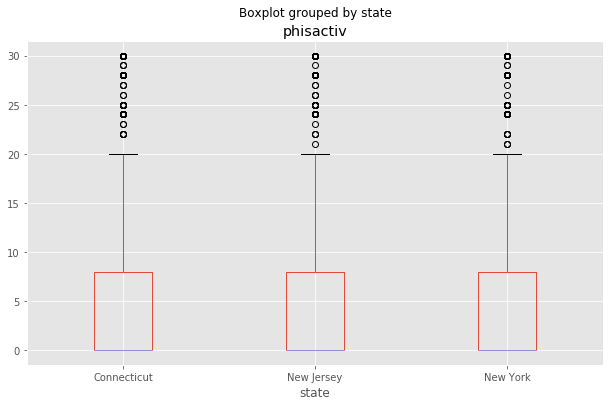

In [87]:
df1.boxplot('phisactiv', by='state', figsize=(10,6))
plt.show()

In [88]:
print(anova_test(df1[['state','phisactiv']], 'phisactiv', 95))


        We reject the null Hypotesys because the test statistic falls in the rejection area.
        Based one statistical test our value pr = 0.0005195653254757081, which smaller then trashold = 0.05.
        


# Select/create a binary variable from the survey questions as you dependent variable and perform the following:

In [89]:
df1['MARITAL'] = df1['MARITAL'].map({1.0 : 'Yes', 5.0 : 'No'})
df1.dropna(subset=['MARITAL'], inplace = True)

# Create a confidence interval for a population proportion.

In [90]:
true_pop_m = df1[df1['MARITAL']=='Yes']['MARITAL'] # Data with only who takes insulin
print(conf_interv_true_pop(df1['MARITAL'], true_pop_m, 95))


        
        We are 95% confident that proportion of chronicly sick people for the overal population falls btw 71.73% and 72.95%
        


# Perform a two proportions z-test using gender.

In [91]:
married_male = df1[df1['SEX']=='Male']
married_female = df1[df1['SEX']=='Female']

In [92]:
print(two_population_proportion_test(married_male, married_female, 'MARITAL', 95))


        We reject the null Hypotesys. Based one statistical test difference of 2 proportions
        our value = -3.0, which gets in rejection area defined by critical values 1.96 and -1.96.
        


# Perform a Chi-Square test using your categorical independent variable.

In [93]:
marital_by_state = df1.groupby('MARITAL')['state'].value_counts().unstack()

In [94]:
print(run_chiss(marital_by_state,95))

critical = 0.103, stat = 153.256
5.259962644096122e-34

        We reject the null Hypotesys. Based one statistical Chi test: 
        stat value = 153.26, which gets in rejection area defined by critical values 0.1.
        
